# Notebook for Generating Plots and Figures

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bugs.csv')
print(f"Loadede {len(df)} rows.")
df.head()

Loadede 115 rows.


,Bug ID,Reported In,URL,Database,Version / Commit,R Uncommitted,R Committed,Repeatable R,Serializable,Pessimistic,Optimistic,Interesting,Bug summary,Transaction Bug,Bug type,Deterministic,# Connections,Root cause,Issue closed
0,MDEV-14868,ICSE2024,https://jira.mariadb.org/browse/MDEV-14868,MariaDB,10.2.12-encrypted-logs,True,True,True,True,False,False,False,Rollbacks make the server crash.,True,Crash,True,1,NaN,True
1,MDEV-16024,ICSE2024,https://jira.mariadb.org/browse/MDEV-16024,MariaDB,10.3.6,True,True,True,True,False,False,False,The begin_timestamp of a transaction is larger...,True,Incorrect database state,True,1,NaN,True
2,MDEV-16675,ICSE2024,https://jira.mariadb.org/browse/MDEV-16675,MariaDB,10.3.8-debug (patched),True,True,True,True,False,False,False,"In this test, there is no conflict, and the DE...",True,Low performance,True,1,NaN,True
3,MDEV-18044,ICSE2024,https://jira.mariadb.org/browse/MDEV-18044,MariaDB,10.3.8-debug,True,True,True,True,False,False,False,Adding an IF statement unecessarily adds a row...,True,Unnecessary locking,True,2,NaN,False
4,MDEV-19535,ICSE2024,https://jira.mariadb.org/browse/MDEV-19535,MariaDB,10.4.5,False,False,True,True,False,False,True,Setting sql_mode='ORACLE' makes MariaDB miss s...,True,Missing blocking,True,2,NaN,True


In [43]:
paper_to_title = {
    "Other": "Other",
    "ASE2022": "DT2 (ASE 2022)",
    "ICSE2024": "Survey Paper (ICSE 2024)",
    "OSDI2023": "TxCheck (OSDI 2023)",
}

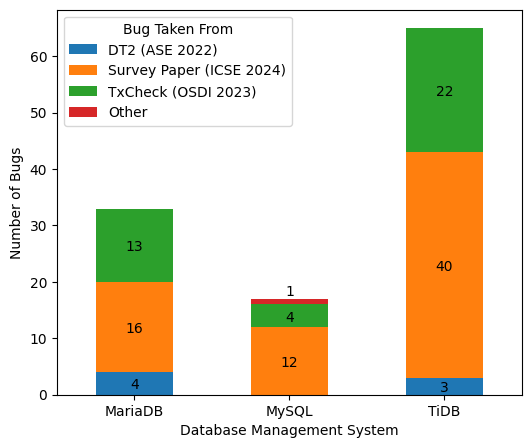

In [53]:
# Group by 'Database' and 'Reported In' and count the number of bugs
grouped = df.groupby(['Database', 'Reported In']).size().unstack().fillna(0)

# Rename the 'Reported In' field
grouped.columns = grouped.columns.map(lambda s: paper_to_title[s])

# Plot the data
ax = grouped.plot(kind='bar', stacked=True, ylabel='Number of Bugs', xlabel='Database Management System', figsize=(6, 5))

# Annotate the bars with the number of bugs
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height == 0:
        continue
    x, y = p.get_xy()
    new_x = x + width / 2
    new_y = y + height / 2 - 1
    if height == 1:
        new_y += 2
    ax.annotate(f'{height:.0f}', (new_x, new_y), ha='center')
ax.set_xticklabels(grouped.index, rotation=0, ha='center')
plt.legend(title='Bug Taken From')

plt.savefig('../assets/bug_replication_bugs_by_dbms_and_paper.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='Database'>

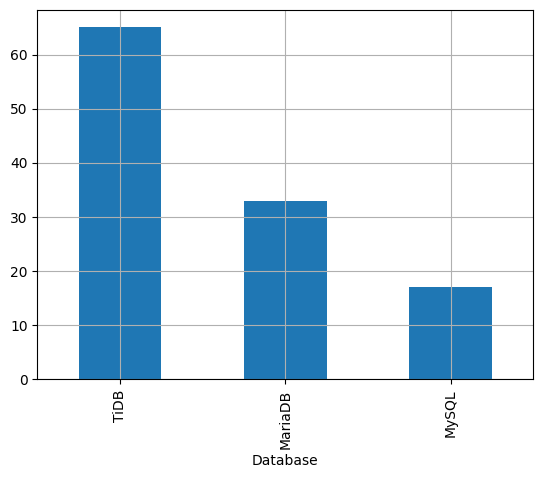

In [12]:
# Generate a plot of the number of bugs per database system
# Add grid lines and the actual values to each bar
df['Database'].value_counts().plot(kind='bar', grid=True)